<a href="https://colab.research.google.com/github/rosarm00/MLUCM2223/blob/main/PR%C3%81CTICA_FINAL_ML_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PRÁCTICA FINAL MACHINE LEARNING**

Victoria Flores Caro, Rosa Ramos Mora, Marina Sánchez Sánchez

Como hemos mencionado al final del otro cuaderno, ahora vamos a continuar con el trabajo a partir de las modificaciones que hemos hecho en nuestra base de datos. Para ello primero cargamos los datos y librerías necesarias.

In [ ]:
from google.colab import drive
drive.mount('/content/folders/')

Drive already mounted at /content/folders/; to attempt to forcibly remount, call drive.mount("/content/folders/", force_remount=True).


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt # para dibujar
import plotly.express as px
%matplotlib inline

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt

%matplotlib inline

from statistics import mean
import pandas as pd
import numpy as np
import math
import random

import imblearn
from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
import seaborn as sns

import scipy
from scipy import stats

import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error,confusion_matrix, recall_score,f1_score, precision_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


from collections import Counter

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [ ]:
import sys
sys.path.append('/content/folders/MyDrive/Colab Notebooks/')

In [ ]:
import funciones_auxiliares 

In [ ]:
df_train = pd.read_csv("/content/folders/MyDrive/Colab Notebooks/df_procesado_train",sep="\t",low_memory=False)
df_test = pd.read_csv("/content/folders/MyDrive/Colab Notebooks/df_procesado_test",sep="\t",low_memory=False)
df_train.shape

(169046, 19)

In [ ]:
df_train

,Unnamed: 0,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,V_AGE,C_SEV
0,0,1,4,23,1,6,2,6,2,1,80,1,1,53,11,1,1,12,0
1,1,12,2,14,2,21,2,1,1,1,1,8,1,49,11,2,1,7,0
2,2,6,6,0,2,32,2,3,2,2,1,1,1,20,11,2,1,4,0
3,3,8,2,19,2,35,2,1,1,1,3,14,1,62,11,9,5,12,0
4,4,6,7,3,2,22,1,1,1,1,18,1,1,17,11,2,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169041,169041,2,6,0,2,21,2,2,1,1,18,1,0,18,11,2,1,7,1
169042,169042,1,1,16,12,21,1,6,3,1,18,1,1,61,11,2,1,0,1
169043,169043,8,3,20,5,21,2,1,1,1,18,1,1,33,21,2,2,12,1
169044,169044,8,5,22,2,31,1,6,2,3,18,6,0,37,13,2,2,5,1


In [ ]:
#Vemos que la primera columna solo muestra el número de filas, por tanto la 
#vamos a eliminar
df_train=df_train.drop(columns=df_train.columns[0])
df_train

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,V_AGE,C_SEV
0,1,4,23,1,6,2,6,2,1,80,1,1,53,11,1,1,12,0
1,12,2,14,2,21,2,1,1,1,1,8,1,49,11,2,1,7,0
2,6,6,0,2,32,2,3,2,2,1,1,1,20,11,2,1,4,0
3,8,2,19,2,35,2,1,1,1,3,14,1,62,11,9,5,12,0
4,6,7,3,2,22,1,1,1,1,18,1,1,17,11,2,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169041,2,6,0,2,21,2,2,1,1,18,1,0,18,11,2,1,7,1
169042,1,1,16,12,21,1,6,3,1,18,1,1,61,11,2,1,0,1
169043,8,3,20,5,21,2,1,1,1,18,1,1,33,21,2,2,12,1
169044,8,5,22,2,31,1,6,2,3,18,6,0,37,13,2,2,5,1


In [ ]:
y_train=df_train['C_SEV'].copy()
y_train

0         0
1         0
2         0
3         0
4         0
         ..
169041    1
169042    1
169043    1
169044    1
169045    1
Name: C_SEV, Length: 169046, dtype: int64

In [ ]:
df_train.drop('C_SEV',axis=1, inplace=True)
df_train

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,V_AGE
0,1,4,23,1,6,2,6,2,1,80,1,1,53,11,1,1,12
1,12,2,14,2,21,2,1,1,1,1,8,1,49,11,2,1,7
2,6,6,0,2,32,2,3,2,2,1,1,1,20,11,2,1,4
3,8,2,19,2,35,2,1,1,1,3,14,1,62,11,9,5,12
4,6,7,3,2,22,1,1,1,1,18,1,1,17,11,2,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169041,2,6,0,2,21,2,2,1,1,18,1,0,18,11,2,1,7
169042,1,1,16,12,21,1,6,3,1,18,1,1,61,11,2,1,0
169043,8,3,20,5,21,2,1,1,1,18,1,1,33,21,2,2,12
169044,8,5,22,2,31,1,6,2,3,18,6,0,37,13,2,2,5


In [ ]:
df_test=df_test.drop(columns=df_test.columns[0])
y_test=df_test['C_SEV'].copy()
df_test.drop('C_SEV',axis=1, inplace=True)
df_test

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,V_AGE
0,12,6,11,2,36,2,1,1,1,3,1,1,49,11,2,1,13
1,8,3,14,2,35,2,1,1,1,1,1,1,33,11,2,1,11
2,10,1,15,2,35,2,1,1,1,3,1,1,35,11,2,1,8
3,4,5,9,2,21,4,2,1,1,18,7,1,31,11,1,1,1
4,7,2,16,1,31,1,2,1,1,18,5,1,4,32,2,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50632,12,7,5,1,4,1,2,1,4,18,1,1,18,23,2,2,9
50633,11,6,18,2,33,1,6,2,1,18,1,1,5,13,2,2,6
50634,7,7,17,2,21,2,1,1,1,18,80,1,19,11,13,1,3
50635,9,5,18,2,35,2,1,1,1,3,1,1,22,13,2,2,4


# **8. ESCALADO DE LOS DATOS**
Como ya sabemos, para alguno de modelos que vamos a usar a continuación necesitan que los datos estén escalados.

In [ ]:
df_train_normal=(df_train-df_train.mean())/df_train.std()
df_test_normal=(df_test-df_test.mean())/df_test.std()
df_train_normal.describe()

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,V_AGE
count,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05
mean,-5.270877e-17,8.406502e-18,-1.422380e-16,-4.741267e-17,-1.244162e-17,-1.798991e-17,-6.725201e-18,-4.943023e-17,-1.647674e-17,-9.818794e-17,-5.850925e-17,9.549786e-17,-1.392117e-16,5.043901e-18,1.126471e-17,-2.690081e-18,-3.850178e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.695927e+00,-1.611677e+00,-2.303469e+00,-3.647893e-01,-1.402994e+00,-2.089766e-01,-2.096662e-01,-2.334508e-01,-1.900474e-01,-1.168778e+00,-2.831353e-01,-1.284405e+00,-1.852609e+00,-2.967280e-01,-2.658179e-01,-5.939118e-01,-1.343501e+00
25%,-8.141946e-01,-1.101982e+00,-7.490380e-01,-3.647893e-01,-1.108285e+00,-2.089766e-01,-2.096662e-01,-2.334508e-01,-1.900474e-01,-9.889118e-01,-2.831353e-01,-1.284405e+00,-8.509390e-01,-2.967280e-01,-1.498887e-01,-5.939118e-01,-8.162724e-01
50%,6.753760e-02,-8.259044e-02,1.145348e-01,-4.946937e-02,-1.652148e-01,-1.267998e-01,-2.096662e-01,-2.334508e-01,-1.900474e-01,3.600874e-01,-2.831353e-01,7.785658e-01,-1.655855e-01,-2.967280e-01,-1.498887e-01,-5.939118e-01,-1.133005e-01
75%,9.492698e-01,9.368009e-01,8.053930e-01,-4.946937e-02,5.420876e-01,-1.267998e-01,2.586987e-02,-1.645225e-01,4.004409e-02,3.600874e-01,-2.831353e-01,7.785658e-01,6.779264e-01,-1.281926e-01,-1.498887e-01,6.801313e-01,5.896714e-01
max,1.537091e+00,1.446497e+00,1.668966e+00,2.359952e+01,3.253413e+00,6.282991e+00,1.839768e+01,5.211883e+00,1.798718e+01,5.935951e+00,1.179585e+01,7.785658e-01,3.313901e+00,7.034561e+00,8.892593e+00,4.502261e+00,1.605505e+01


# **9. ALGORITMOS DE CLASIFICACIÓN**
Antes de realizar cualquier algoritmo para ver cómo de bueno es nuestro modelo y valorar su funcionamiento, es importante notar que tenemos una base de datos con un importante desbalanceo (menos del 10% de observaciones se corresponden con accidentes mortales). Es por ello, que debemos realizar los algortimos con un poco de cuidado. Para ello, vamos a usar como métrica el F2-SCORE para entrenar algunos de uestros modelos y predecir los resultados.

In [ ]:
# En algunos algoritmos usaremos F2 score. Este no existe por defecto.
# Vamos a construir una función auxiliar:
from sklearn.metrics import make_scorer,fbeta_score
def f2_func(y_true, y_pred):
    f2_score = fbeta_score(y_true, y_pred, beta=2)
    return f2_score

def my_f2_scorer():
    return make_scorer(f2_func)

##**A: REGRESIÓN LOGÍSTICA**
El modelo de regresión logística es un algoritmo de clasificación utilizado para predecir si una determinada característica estará presente o no, basándose en un conjunto de datos de entrada. A diferencia de la regresión lineal, que permite predecir valores continuos, la regresión logística se utiliza cuando la variable a predecir solo puede tomar los valores 0 o 1. Esto lo convierte en un algoritmo de clasificación.

En nuestro caso particular, utilizaremos el modelo de regresión logística para predecir si un accidente específico resultará en víctimas mortales (representadas como 1) o no (representadas como 0). Utilizaremos un conjunto de datos y aplicaremos el algoritmo de regresión logística para obtener una predicción. Dependiendo del valor obtenido, interpretaremos que es más probable la presencia o ausencia de víctimas mortales en el accidente en cuestión.

Como hemos mencionado anteriormente, vamos a entrenar el modelo con los datos de entrenamiento y vamos a calcular el F2-SCORE en el conjunto de prueba.

Vemos a continuación el comportamiento de este algoritmo de clasificación con la matriz de confusión, que es una métrica utilizada para examinar cómo de bueno es un modelo. En nuestro caso, podremos distinguir entre los accidentes que se han caracterizado correctamente y los que no.

In [ ]:
from sklearn.metrics import fbeta_score

# Obtener las columnas comunes en ambos conjuntos de datos
common_columns = set(df_train_normal.columns).intersection(set(df_test_normal.columns))

# Filtrar los conjuntos de datos utilizando las columnas comunes
df_train_filtered = df_train_normal[common_columns]
df_test_filtered = df_test_normal[common_columns]

# Definir el modelo de regresión logística
model = LogisticRegression(random_state=0, class_weight='balanced')

# Entrenar el modelo con los datos de entrenamiento filtrados
model.fit(df_train_filtered, y_train)

# Realizar predicciones en el conjunto de prueba filtrado
y_pred = model.predict(df_test_filtered)
f2_score = fbeta_score(y_test, y_pred, beta=2)

print("F2 score:", f2_score)


<ipython-input-50-c632fa988d17>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_train_filtered = df_train_normal[common_columns]
<ipython-input-50-c632fa988d17>:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_test_filtered = df_test_normal[common_columns]


F2 score: 0.11165349167607738


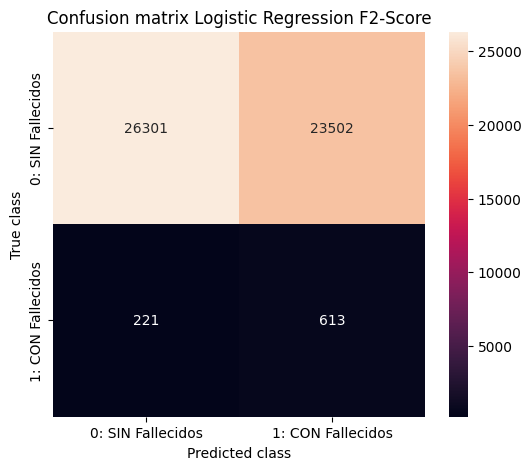

Accuracy: 0.5315085806821099 
Precision Sin Fallecidos: 0.9916672950757861 
Precision Con Fallecidos: 0.02541986315571221 
Recall Sin Fallecidos: 0.5281007168242877 
Recall Con Fallecidos: 0.7350119904076738


In [ ]:
# Calcular la matriz de confusión
conf_matrixlogreg_f2 = confusion_matrix(y_test, y_pred)

# Configurar el gráfico de la matriz de confusión
plt.figure(figsize=(6, 5))
labels = ['0: SIN Fallecidos', '1: CON Fallecidos']
sns.heatmap(conf_matrixlogreg_f2, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")
plt.title("Confusion matrix Logistic Regression F2-Score")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Calcular métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
precision_sin_fall = precision_score(y_test, y_pred, pos_label=0)
precision_con_fall = precision_score(y_test, y_pred, pos_label=1)
recall_sin_fall = recall_score(y_test, y_pred, pos_label=0)
recall_con_fall = recall_score(y_test, y_pred, pos_label=1)

# Imprimir las métricas de desempeño
print('Accuracy:', accuracy, '\n'
      'Precision Sin Fallecidos:', precision_sin_fall, '\n'
      'Precision Con Fallecidos:', precision_con_fall, '\n'
      'Recall Sin Fallecidos:', recall_sin_fall, '\n'
      'Recall Con Fallecidos:', recall_con_fall)

Este modelo sólo predice el 73,5% de los datos, por tanto podemos decir que no es demasiado eficaz ya que una gran parte de estos accidentes no se están teniendo en cuenta.
Además el modelo predice de manera errónea que 23502 accidentes van a presentar víctimas mortales, lo cual puede llevarnos a conclusiones equivocadas.


##**B: ÁRBOL DE DECISIÓN SIMPLE**
Este método funciona dividiendo la población en diferentes grupos para encontrar las características que mejor los clasifican. Comenzamos con todos los datos y buscamos la mejor forma de separarlos en clases utilizando métodos de selección. Luego, creamos un nodo que verifica si cada muestra tiene esa característica o no, y clasificamos cada elemento en las subpoblaciones resultantes. De esta manera, construimos un árbol de decisión que nos ayuda a clasificar correctamente un individuo al analizar sus características. En nuestro caso, asignamos el valor 0 si creemos que, según las características del accidente, no habrá víctimas mortales, o asignamos el valor 1 en caso contrario.

In [ ]:
# Crear el clasificador de árbol de decisión
clf_tree = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
clf_tree.fit(df_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = clf_tree.predict(df_test)

In [ ]:
# Calcular el error RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular el error MAE
mae = mean_absolute_error(y_test, y_pred)

# Imprimir los resultados
print('RMSE is:', rmse)
print('MAE is:', mae)

RMSE is: 0.5396204558654274
MAE is: 0.2911902363884116


Como podemos observar tenemos errores medianamente aceptables. El RMSE de 0,5396 nos está indicando que, en promedio, las predicciones del modelo difieren en dicho valor de los valores reales. El MAE de 0,2912 nos indica una diferencia promedio entre las predicciones y los valores reales

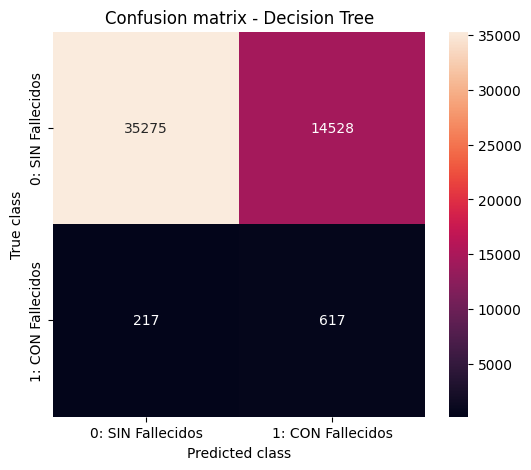

Accuracy: 0.7088097636115883
Precision Sin Fallecidos: 0.9938859461287051
Precision Con Fallecidos: 0.040739517992736875
Recall Sin Fallecidos: 0.7082906652209706
Recall Con Fallecidos: 0.7398081534772182


In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
labels = ['0: SIN Fallecidos', '1: CON Fallecidos']
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")
plt.title("Confusion matrix - Decision Tree")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision_sin_fall = precision_score(y_test, y_pred, pos_label=0)
precision_con_fall = precision_score(y_test, y_pred, pos_label=1)
recall_sin_fall = recall_score(y_test, y_pred, pos_label=0)
recall_con_fall = recall_score(y_test, y_pred, pos_label=1)

# Imprimir las métricas
print('Accuracy:', accuracy)
print('Precision Sin Fallecidos:', precision_sin_fall)
print('Precision Con Fallecidos:', precision_con_fall)
print('Recall Sin Fallecidos:', recall_sin_fall)
print('Recall Con Fallecidos:', recall_con_fall)

Vemos, al igual que en el modelo anterior, que no es demasidado eficaz a la hora de predecir accidentes mortales ya que tan sólo es capaz de anticipar un 73,9% de los mismos. 

##**C: RANDOM FOREST**
Su objetivo es construir un conjunto de árboles de decisión, donde cada árbol se entrena con una muestra aleatoria de datos y realiza predicciones individuales. Durante la construcción de cada árbol, se seleccionan características de forma aleatoria en cada división, lo que introduce diversidad en el conjunto de árboles y evita que un subconjunto específico de características tenga un impacto dominante en la clasificación. Luego, se realiza una votación entre los árboles para determinar la clase predicha final. 


En este caso hacemos uso de los datos escalados

In [ ]:
# Crear el modelo de Random Forest con 20 estimadores
rf_model = RandomForestClassifier(n_estimators=20, random_state=0)

# Entrenar el modelo
rf_model.fit(df_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(df_test)

In [ ]:
# Calcular el RMSE y MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Imprimir los resultados
print('RMSE is:', rmse)
print("R2:", r2)
print('MAE is:', mae)

RMSE is: 0.4600259898844379
R2: -12.064088624287605
MAE is: 0.21162391136915695


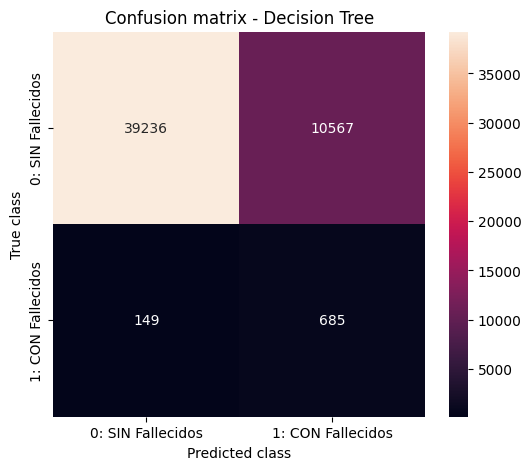

Accuracy: 0.7883760886308431
Precision Sin Fallecidos: 0.9962168338199823
Precision Con Fallecidos: 0.06087806612157839
Recall Sin Fallecidos: 0.7878240266650604
Recall Con Fallecidos: 0.8213429256594724


In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
labels = ['0: SIN Fallecidos', '1: CON Fallecidos']
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")
plt.title("Confusion matrix - Decision Tree")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision_sin_fall = precision_score(y_test, y_pred, pos_label=0)
precision_con_fall = precision_score(y_test, y_pred, pos_label=1)
recall_sin_fall = recall_score(y_test, y_pred, pos_label=0)
recall_con_fall = recall_score(y_test, y_pred, pos_label=1)

# Imprimir las métricas
print('Accuracy:', accuracy)
print('Precision Sin Fallecidos:', precision_sin_fall)
print('Precision Con Fallecidos:', precision_con_fall)
print('Recall Sin Fallecidos:', recall_sin_fall)
print('Recall Con Fallecidos:', recall_con_fall)


En este modelo, podemos ver la precisión ha aumentado significativamente en comparación a los dos anteriores, llegando a predecir un 82,1% de los accidentes mortales. Además se reduce el número de falsos fallecimiento, lo cual posiciona este algoritmo como el mejor hasta el momento.

##**D: KNN**
Se basa en la idea de que puntos de datos similares tienden a pertenecer a la misma clase. En lugar de aprender explícitamente un modelo a partir de los datos de entrenamiento, KNN simplemente almacena los datos de entrenamiento y las etiquetas correspondientes.

Cuando se recibe un nuevo punto de datos que se desea clasificar, KNN busca los k puntos más cercanos en el conjunto de entrenamiento. La cercanía se determina utilizando una medida de distancia, como la distancia euclidiana. Los k vecinos más cercanos se seleccionan en función de su proximidad al nuevo punto.

Una vez que se han identificado los k vecinos más cercanos, KNN utiliza un esquema de votación para asignar una etiqueta al nuevo punto. Cada vecino vota por su etiqueta correspondiente, y la etiqueta más común entre los vecinos se asigna al nuevo punto. Por ejemplo, si la mayoría de los vecinos más cercanos pertenecen a la clase "A", se clasificará al nuevo punto como perteneciente a la clase "A".

In [ ]:
# Crear el modelo KNN con k=5 (puedes ajustar el valor de k según tus necesidades)
knn_model = KNeighborsClassifier(n_neighbors=35)

# Entrenar el modelo
knn_model.fit(df_train, y_train)

KNeighborsClassifier(n_neighbors=35)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(df_test)

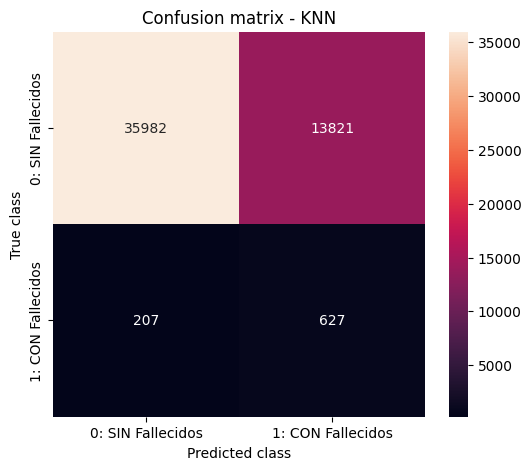

Accuracy: 0.7229693702233545
Precision Sin Fallecidos: 0.9942800298433225
Precision Con Fallecidos: 0.04339700996677741
Recall Sin Fallecidos: 0.7224865971929402
Recall Con Fallecidos: 0.7517985611510791


In [ ]:
conf_matrixKNN = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
labels = ['0: SIN Fallecidos', '1: CON Fallecidos']
sns.heatmap(conf_matrixKNN, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")
plt.title("Confusion matrix - KNN")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision_sin_fall = precision_score(y_test, y_pred, pos_label=0)
precision_con_fall = precision_score(y_test, y_pred, pos_label=1)
recall_sin_fall = recall_score(y_test, y_pred, pos_label=0)
recall_con_fall = recall_score(y_test, y_pred, pos_label=1)

print('Accuracy:', accuracy)
print('Precision Sin Fallecidos:', precision_sin_fall)
print('Precision Con Fallecidos:', precision_con_fall)
print('Recall Sin Fallecidos:', recall_sin_fall)
print('Recall Con Fallecidos:', recall_con_fall)

Observamos respecto al anterior que perdemos algo de precisión en comparación como los vistos anteriormente. 

##**E: GRADIENT BOOST**
Algoritmo que combina varios modelos simples para crear un modelo final más preciso. Comienza con un modelo inicial y luego construye modelos adicionales para corregir los errores del modelo anterior. Cada nuevo modelo se enfoca en los errores residuales del modelo anterior. Este proceso se repite hasta obtener un modelo final más fuerte y preciso.

In [ ]:
# Crear un modelo Gradient Boosting
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
clf_gb.fit(df_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = clf_gb.predict(df_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.7712739696269526


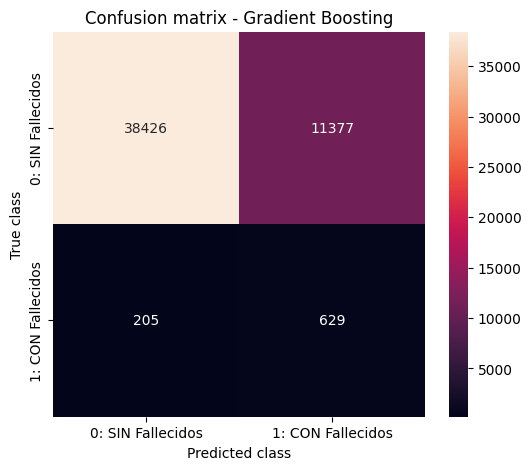

Accuracy: 0.7712739696269526
Precision Sin Fallecidos: 0.9946933809634749
Precision Con Fallecidos: 0.05239047143095119
Recall Sin Fallecidos: 0.7715599461879806
Recall Con Fallecidos: 0.7541966426858513


In [ ]:
conf_matrix_gb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
labels = ['0: SIN Fallecidos', '1: CON Fallecidos']
sns.heatmap(conf_matrix_gb, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")
plt.title("Confusion matrix - Gradient Boosting")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision_sin_fall = precision_score(y_test, y_pred, pos_label=0)
precision_con_fall = precision_score(y_test, y_pred, pos_label=1)
recall_sin_fall = recall_score(y_test, y_pred, pos_label=0)
recall_con_fall = recall_score(y_test, y_pred, pos_label=1)

print('Accuracy:', accuracy)
print('Precision Sin Fallecidos:', precision_sin_fall)
print('Precision Con Fallecidos:', precision_con_fall)
print('Recall Sin Fallecidos:', recall_sin_fall)
print('Recall Con Fallecidos:', recall_con_fall)

En la línea del anterior, no observamos mejoría en precisión. Obtenemos unos valores muy similares a los que ya teniamos.

##**F: SVM**
Este algorimo denominado por sus siglas SVM (Support- Vector Machines) consiste en realizar una separación de los datos por un hiperplano, de manera que todos los datos que pertenencen a la primera clase (Y=0) se sitúan en un lado del hiperplano, y los de la otra clase en el otro. Para ello, se elige como separación el hiperplano que maximiza la distancia de las dos observaciones de categorias distintas más cercanas a él.

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Crear un modelo SVM con kernel rbf
svm = SVC(kernel='rbf', C=1.0)

In [ ]:
svm.fit(df_train, y_train)

SVC()

In [ ]:
# Hacer predicciones con los datos de prueba
y_pred = svm.predict(df_test)

In [ ]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo: {:.2f}".format(accuracy))

Precisión del modelo: 0.68


En primer lugar, este método conlleva un gran coste computacional por lo que nos ha llevado bastante tiempo para poder hacer uso del mismo. Además, observamos que la precisión que nos ofrece es bastante baja en comparación a los anteriores. Si es cierto, que existen métodos de validación cruzada que hacen el modelo funcione de forma satisfacctoria a pesar del tiempo que puede emplearse en ello. 

#**10. CONCLUSIONES**

Recordemos que nuestro objetivo principal era detectar vícitimas mortales en accidentes de tráfico a través del uso de algoritmos de Machine Learning y técnicas de clasificación y selección vistas durante el curso. Además de predecir cuáles son las variables que más influyen en que un accidente pueda ser mortal o no y contrastarlas con las hipótesis de la DGT.

Para ello, hemos usado diferentes algoritmos de clasificación como son la regresión logística, árboles de decisión, random forest, KNN, GradientBoost oVSM para finalmente predecir cual es el que mejor se ajusta a los datos reales. Con el fin de establecer un orden de precisión entre los mismos, vamos fijarnos en el Accuracy de cada modelo que hace referencia al número de casos que el modelo ha acertado: 
- Regresión Logística: 53%
- Árboles de decisión: 71%
- Random Forest: 79%
- KNN: 72%
- GradientBoost: 77%
- SVM: 68%

Una vez examinados dichos valores, observamos que Random Forest y GradientBoost destacan por encima del resto. Si recordamos la matriz de confusión de ambos modelos, podemos decir que el algoritmo de **Random Forest** es el que mejor se ajusta a los datos reales.

Es importante recalcar que con esta base de datos hemos tenido algunos problemas a la hora de realizar el preprocessing debido a la cantidad de missing datos que hemos tenido, algunos datos no eran numéricos, o  el desbalanceo de los mismos. Es por ello, que estos datos de precisión son aproximados, pues sería necesario emplear técnicas de validación cruzada (por ejemplo) en los diferentes algoritmos para encontrar valores más exactos lo cual se sale del curso. A pesar de ello, nos ha resultado muy interesante trabajar con esta base de datos pues es algo que está muy presente en nuestras vidas cotidianas y que nos preocupa bastante a la hora de coger un coche. Sin embargo, a pesar de los numerosos estudios que pueda haber sobre ello, es algo completamente impredecible pues existen incontables factores que pueden estar involucrados en un accidente de tráfico de los cuales no tenemos control.

En cuanto a las preguntas plateadas al principio del problema, éstas se han ido respondiendo a medida que nos han ido dando resultados los procesos de selección de las características. 



